# Perceptron
Un perceptrón es una **neurona artificial**, y, por tanto, una unidad de red neuronal.<br> El perceptrón efectúa cálculos para detectar características o tendencias en los datos de entrada.<br>
Se trata de un algoritmo para el aprendizaje supervisado de clasificadores binarios.<br> Ese algoritmo es el que permite que las neuronas artificiales aprendan y traten los elementos de una serie de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

def sigmoide_derivada_respecto_z(z):
    return sigmoide(z)*(1-sigmoide(z))

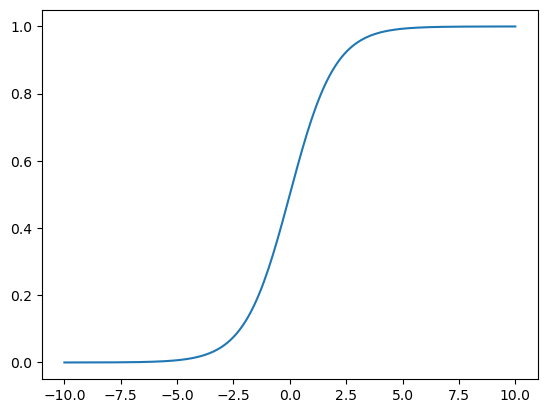

In [3]:
xs = np.linspace(-10, 10, 200)
ys = sigmoide(xs)
plt.plot(xs, ys)

> Creación de dataset

In [4]:
dt = [[0,0,0],[0,1,1],[1,0,1],[1,1,1]]
dt = np.array(dt)
dt

array([[0, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

Quiero sacar las 2 primeras columnas que son las 'x's:

In [8]:
x = dt[:, [0,1]]
y = dt[:, [2]]
print(x)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [1]]


FÓRMULA --> Z = X1 * W1 + X2 * W2 + b

In [21]:
global w1, w2, b
w1 = 2; w2 = 3; b = 4

def salida_sumatorio(x):
    x1 = x[:, [0]] 
    x2 = x[:, [1]]
    x1 = x1 * w1
    x2 = x2 * w2
    ret = x1 + x2 + b
    return ret

def salida_activacion(x):
    # 1º) Se saca las salidas del sumatorio
    s = salida_sumatorio(x)
    # 2º) Sigmoide
    s2 = sigmoide(s)
    return s2

def error(x, y):
    y_hat = salida_activacion(x)
    err = y_hat - y
    return err

def coste(x, y):
    err = error(x, y)
    c = err**2
    c = c/2
    c = c.mean()
    return c

# GRADIENTE
def derivada_coste_respecto_y_hat(x, y):
    z = error(x, y)
    z = z.mean()
    return z

def derivada_y_hat_respecto_salida_sumatorio(x):
    z = salida_sumatorio(x)
    d = sigmoide_derivada_respecto_z(z)
    return d

def derivada_sumatorio_respecto_w1(x):
    return x[:, [0]]

def derivada_sumatorio_respecto_w2(x):
    return x[:, [1]]

def derivada_sumatorio_respecto_bias():
    return 1

def predice(x):
  y_hat = salida_activacion(x)
  return y_hat


In [28]:
# El batch_size ya se sabe que son 4, paquetesd de 4
def fit (x, y, epochs = 100, lr = 0.01):
    global w1, w2, b
    lloss = []
    for epoch in range(epochs):
        dc = derivada_coste_respecto_y_hat(x, y)
        dy = derivada_y_hat_respecto_salida_sumatorio(x)
        dw1 = derivada_sumatorio_respecto_w1(x)
        dw2 = derivada_sumatorio_respecto_w2(x)
        db = derivada_sumatorio_respecto_bias()

        w1 = w1 - lr*dc*dy*dw1.mean()
        w2 = w2 - lr*dc*dy*dw2.mean()
        b = b - lr*dc*dy*b  # No hace falta la media ya que es 1

        loss = coste(x, y)
        print(f"loss: {loss} w1: {w1} w2: {w2} b: {b}")
        lloss.append(loss)


In [29]:
w1 = 0
w2 = 0
b = 0
nepochs = 100

fit(x, y, epochs=nepochs)

ret = predice(x)
print(ret)

loss: 0.12496094207843123 w1: [[0.0003125]
 [0.0003125]
 [0.0003125]
 [0.0003125]] w2: [[0.0003125]
 [0.0003125]
 [0.0003125]
 [0.0003125]] b: [[0.]
 [0.]
 [0.]
 [0.]]
loss: 0.12492190552058965 w1: [[0.0006249]
 [0.0006249]
 [0.0006249]
 [0.0006249]] w2: [[0.0006249]
 [0.0006249]
 [0.0006249]
 [0.0006249]] b: [[0.]
 [0.]
 [0.]
 [0.]]
loss: 0.12488289032358471 w1: [[0.00093721]
 [0.00093721]
 [0.00093721]
 [0.00093721]] w2: [[0.00093721]
 [0.00093721]
 [0.00093721]
 [0.00093721]] b: [[0.]
 [0.]
 [0.]
 [0.]]
loss: 0.12484389648450173 w1: [[0.00124941]
 [0.00124941]
 [0.00124941]
 [0.00124941]] w2: [[0.00124941]
 [0.00124941]
 [0.00124941]
 [0.00124941]] b: [[0.]
 [0.]
 [0.]
 [0.]]
loss: 0.12480492400040206 w1: [[0.00156152]
 [0.00156152]
 [0.00156152]
 [0.00156152]] w2: [[0.00156152]
 [0.00156152]
 [0.00156152]
 [0.00156152]] b: [[0.]
 [0.]
 [0.]
 [0.]]
loss: 0.12476597286832299 w1: [[0.00187354]
 [0.00187354]
 [0.00187354]
 [0.00187353]] w2: [[0.00187354]
 [0.00187354]
 [0.00187354]
 [0